In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
data = pd.read_csv('/home/nikit/Desktop/coronary_heart_disease/saheart_1_withheader.csv',delimiter=',')
data['CLASS'] = data['CLASS'].astype('category')
data['is_train'] = np.random.uniform(0, 1, len(data)) <= .75
train, test = data[data['is_train']==True], data[data['is_train']==False]
train.head(10)

,CLASS,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,is_train
2,-1,118,0.08,3.48,32.28,1,52,29.14,3.81,46,True
3,1,170,7.50,6.41,38.03,1,51,31.99,24.26,58,True
4,1,134,13.60,3.50,27.78,1,60,25.99,57.34,49,True
5,-1,132,6.20,6.47,36.21,1,62,30.77,14.14,45,True
6,-1,142,4.05,3.38,16.20,0,59,20.81,2.62,38,True
7,1,114,4.08,4.59,14.60,1,62,23.11,6.72,58,True
8,-1,114,0.00,3.83,19.40,1,49,24.86,2.49,29,True
9,1,132,0.00,5.80,30.96,1,69,30.11,0.00,53,True
10,1,206,6.00,2.95,32.27,0,72,26.81,56.06,60,True
11,1,134,14.10,4.44,22.39,1,65,23.09,0.00,40,True


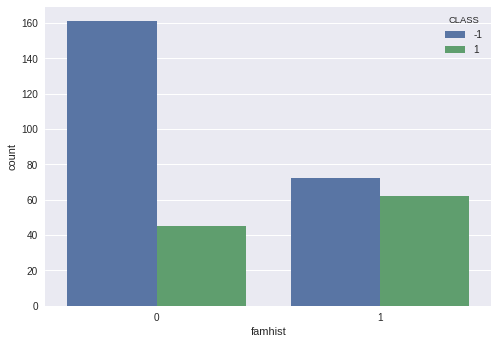

In [3]:
sns.countplot(train['famhist'],hue=train['CLASS'])
plt.show()

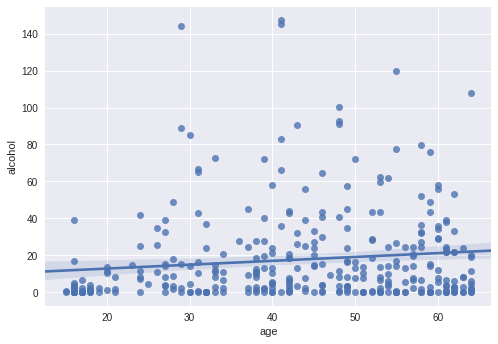

In [4]:
sns.regplot(x=train['age'],y=train['alcohol'])
plt.show()

####Boom, the violin plots are mostly skewed to right and helps us understand that people in higher age and high tobacco intake will have heart diseases

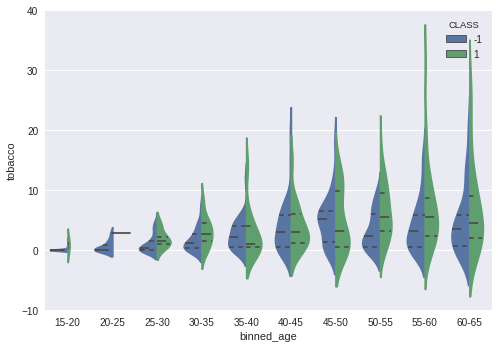

In [5]:
data['binned_age'] = pd.cut(data['age'],[15,20,25,30,35,40,45,50,55,60,65],labels=['15-20','20-25','25-30','30-35','35-40', \
                                                                                   '40-45','45-50','50-55','55-60','60-65'])
sns.violinplot(x="binned_age",y="tobacco",data=data,hue="CLASS",split=True,inner="quartile")
sns.plt.show()

######young population till the age <30 do have bad cholestrol but are rather safe from having heart disease.
######this can be because low aged population have higher immunity.

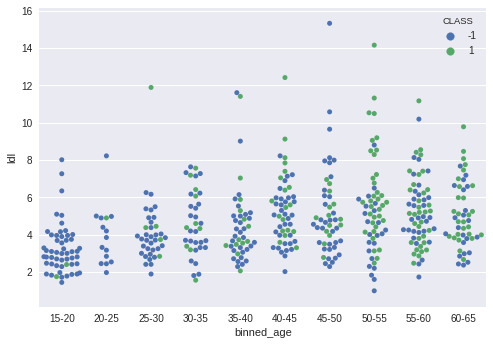

In [6]:
#ldl is bad cholestrol and having high levels can lead to heart diseases.


sns.swarmplot(x="binned_age",y="ldl",data=data,hue="CLASS")
sns.plt.show()

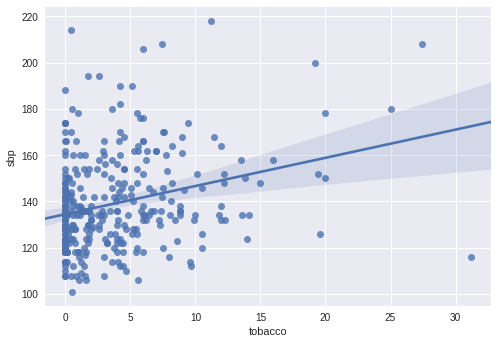

In [7]:
#increase in tobacco consumption may result in increase of systolic blood pressure.

sns.regplot(x="tobacco",y="sbp",data=train)
plt.show()

In [8]:
features = train.columns[1:]
features

Index([u'sbp', u'tobacco', u'ldl', u'adiposity', u'famhist', u'typea',
       u'obesity', u'alcohol', u'age', u'is_train'],
      dtype='object')

In [9]:
X = train[features]
y = train['CLASS']
clf = RandomForestClassifier()
clf.fit(X,y)
imp = clf.feature_importances_
print(imp)
result = clf.predict(test[features])

[ 0.08170877  0.19150503  0.09953465  0.11664096  0.0269799   0.1015794
  0.12824665  0.08483149  0.16897314  0.        ]


In [10]:
pd.crosstab(test['CLASS'],result,rownames=['Actual'],colnames=['preds'])

preds,-1,1
Actual,,
-1,63,6
1,33,20


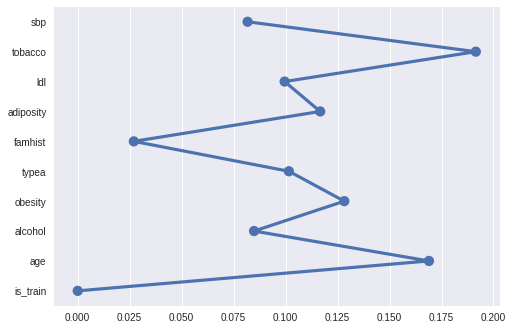

In [11]:
sns.pointplot(x=imp,y=features)
sns.plt.show()

In [12]:
pscore = metrics.accuracy_score(test['CLASS'], result)
pscore

0.68032786885245899

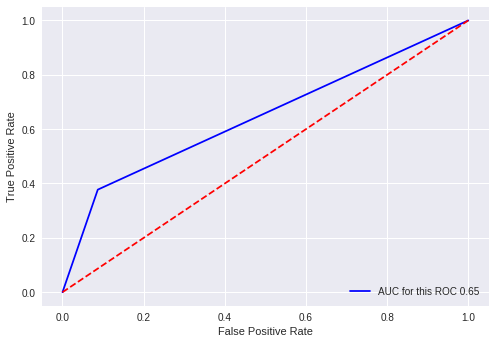

In [13]:
fpr,tpr,threshold = metrics.roc_curve(test['CLASS'],result)
auc = metrics.auc(fpr,tpr)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(fpr,tpr,'b',label = 'AUC for this ROC %0.2f' %auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
#plt,xlim([0,1])
#plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


    let's consider top 4 important features and see how our model performs, in this case we taking sbp, tobacco, idl and age.

In [14]:
train = train[['CLASS','sbp','tobacco','ldl','age']]
test  = test[['CLASS','sbp','tobacco','ldl','age']]
X = train[train.columns[1:]]
y = train['CLASS']



In [15]:
clf = RandomForestClassifier()
clf.fit(X,y)
imp = clf.feature_importances_
print(imp)
result = clf.predict(test[test.columns[1:]])

[ 0.22804588  0.27040318  0.24571881  0.25583213]


In [16]:
pd.crosstab(test['CLASS'],result,rownames=['Actual'],colnames=['preds'])

preds,-1,1
Actual,,
-1,53,16
1,35,18


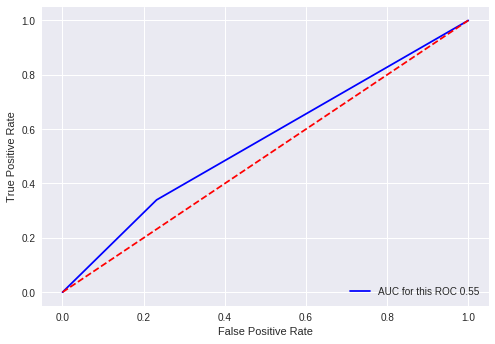

In [17]:
fpr,tpr,threshold = metrics.roc_curve(test['CLASS'],result)
auc = metrics.auc(fpr,tpr)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(fpr,tpr,'b',label = 'AUC for this ROC %0.2f' %auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
#plt,xlim([0,1])
#plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [18]:
pscore = metrics.accuracy_score(test['CLASS'], result)
pscore

0.58196721311475408